In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

__Задание 1.__ Подберите скорость обучения (alpha) и количество итераций:

In [2]:
# n = X.shape[1]
# alpha = 1e-4
# W = np.array([1, 0.5])

# for i in range(1500):
#     y_pred = np.dot(W, X)
#     err = calc_mse(y, y_pred)
#     for ii in range(W.shape[0]):
#         W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
#     if i % 100 == 0:
#         print(i, W, err)

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

Найдем вектор $w$ методом наименьших квадратов:

In [4]:
W = np.linalg.inv(X @ X.T) @ X @ y

W

array([47.23214286,  3.91071429])

In [5]:
y_pred = W[0] + W[1] * X[1]

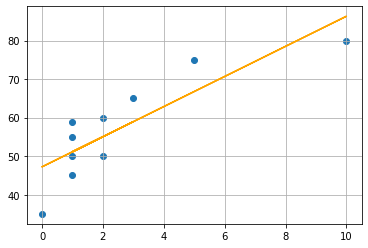

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred, color='orange')
plt.grid()

*Среднеквадратичная ошибка:*

In [7]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [8]:
calc_mse(y, y_pred)

45.93750000000002

Найдем вектор $w$ методом градиентного спуска:

In [9]:
n = X.shape[1]
# alpha = 1e-4
W = np.array([1, 0.5])
accuracy = 1e-10

In [10]:
def gradient_descent(alpha, accuracy):
    
    W = np.array([1, 0.5])
    W_diff = np.inf
    i = 0
    
    while W_diff > accuracy:

        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W_old = W.copy()

        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))

        W_diff = np.linalg.norm(W - W_old, ord=2)
        i += 1
    
    return i, W, err

In [11]:
dictionary = {}

for alpha in np.arange(1e-4, 0.0664, 1e-4):
    i, W, err = gradient_descent(alpha, accuracy)
    dictionary[i] = alpha, W, err

In [12]:
i = min(dictionary.keys())
alpha, W, err = dictionary[i]

print(f'\nЗаданная точность: {accuracy}\nСкорость обучения, при которой количество итераций минимально: {alpha:.4f}\
\nМинимальное количество итераций = {i}\nW0 = {W[0]}, W1 = {W[1]}\nСреднеквадратичная ошибка = {err}')


Заданная точность: 1e-10
Скорость обучения, при которой количество итераций минимально: 0.0638
Минимальное количество итераций = 353
W0 = 47.23214285582216, W1 = 3.910714285968081
Среднеквадратичная ошибка = 45.9375


__Задание 2.__ В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [13]:
# for i in range(1500):
#     y_pred = np.dot(W, X)
#     err = calc_mse(y, y_pred)
#     '''for ii in range(W.shape[0]):
#     W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
#     W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
#     if i % 100 == 0:
#         print(i, W, err)

*В коде две ошибки:*

*1) необходимо заменить поэлементное произведение X * (y_pred - y) на матричное произведение X @ (y_pred - y)*

*2) суммирование np.sum лишнее*

In [14]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])

In [15]:
for i in range(200000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= alpha * (1 / n * 2 * X @ (y_pred - y))
    if i % 10000 == 0:
        print(i, W, err)

0 [1.01102 0.534  ] 3173.15
10000 [31.64431213  6.78912647] 176.59523446839947
20000 [41.72163799  4.92827116] 62.26600944080188
30000 [45.28410632  4.27043414] 47.97810036432719
40000 [46.54348611  4.03788002] 46.192517144215635
50000 [46.98869356  3.95566906] 45.96936990700425
60000 [47.1460803   3.92660639] 45.941482834078
70000 [47.2017186   3.91633236] 45.9379977412482
80000 [47.22138748  3.91270035] 45.93756220353279
90000 [47.22834069  3.91141639] 45.9375077736766
100000 [47.23079874  3.91096249] 45.93750097148897
110000 [47.23166769  3.91080203] 45.93750012140856
120000 [47.23197488  3.9107453 ] 45.93750001517263
130000 [47.23208348  3.91072525] 45.937500001896126
140000 [47.23212186  3.91071816] 45.93750000023697
150000 [47.23213544  3.91071566] 45.93750000002963
160000 [47.23214023  3.91071477] 45.937500000003695
170000 [47.23214193  3.91071446] 45.93750000000047
180000 [47.23214253  3.91071435] 45.93750000000008
190000 [47.23214274  3.91071431] 45.93750000000001
